In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from nilearn import datasets, image, plotting
from nilearn.image import get_data
from fugw.scripts import lmds
import dijkstra3d

In [144]:
n_subjects = 2

contrasts = [
    "sentence reading vs checkerboard",
    "sentence listening",
    "calculation vs sentences",
    "left vs right button press",
    "checkerboard",
]
n_training_contrasts = 4

brain_data = datasets.fetch_localizer_contrasts(
    contrasts,
    n_subjects=n_subjects,
    get_anats=True,
)

source_imgs_paths = brain_data["cmaps"][0 : len(contrasts)]
target_imgs_paths = brain_data["cmaps"][len(contrasts) : 2 * len(contrasts)]

source_im = image.load_img(source_imgs_paths)
target_im = image.load_img(target_imgs_paths)
assert source_im.shape == target_im.shape


source_features = np.nan_to_num(source_im.get_fdata())
target_features = np.nan_to_num(target_im.get_fdata())

#Z = 0
#plt.imshow(source_features[:,:,Z,0], cmap='gray')
#plt.show()


SCALE_FACTOR = 1


source_features = source_features[::SCALE_FACTOR,::SCALE_FACTOR,::SCALE_FACTOR]
target_features = target_features[::SCALE_FACTOR,::SCALE_FACTOR,::SCALE_FACTOR]
data = source_features[:,:,:,0] !=0


source_features = torch.Tensor(source_features[data].T)
target_features = torch.Tensor(target_features[data].T)

/opt/homebrew/lib/python3.11/site-packages/nilearn/datasets/func.py:763: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [145]:
mat = np.array(np.nonzero(data)).T

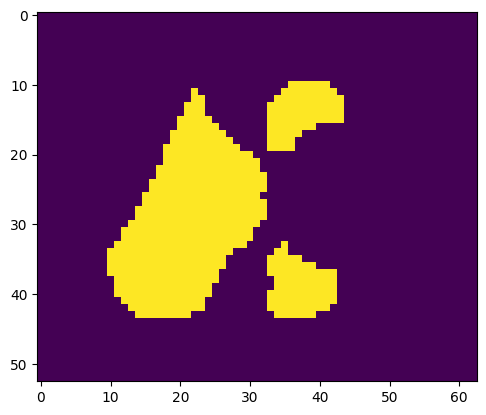

In [146]:
plt.imshow(data[:,:,3])

In [166]:
field = data
source = (5, 20, 20)

df = dijkstra3d.euclidean_distance_field(field, source=source, anisotropy=(1,1,1))
df

array([[[inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf]],

       [[inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf]],

       [[inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf]],

       ...,

       [[inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf],
        [inf, inf, inf, ..., inf, inf, inf

In [167]:
mat.shape

(61099, 3)

In [168]:
df.shape

(53, 63, 46)

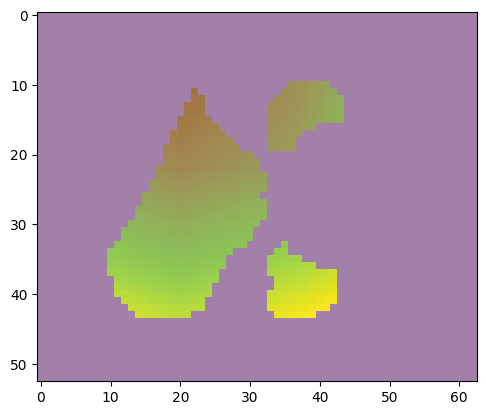

In [162]:
plt.imshow(df[:,:,3])
plt.imshow(data[:,:,3], alpha=0.5)
plt.show()
#df = df[np.isfinite(df)]
data2 = data[np.nonzero(df)]

In [180]:
np.array(np.nonzero(df * field)).T.shape

/var/folders/1s/bxpqz56s6y12_hm461pg_g800000gn/T/ipykernel_16710/1294187756.py:1: RuntimeWarning: invalid value encountered in multiply
  np.array(np.nonzero(df * field)).T.shape


(153593, 3)

In [183]:
from dijkstra3d import distance_field

field.shape
source = [20, 20, 20]
dists = dijkstra3d.distance_field(field, source=source, anisotropy=(1,1,1))

(53, 63, 46)